## 1. Kernel Density Estimate

Produce a KDE for a given distribution (by hand, not using seaborn!):

- Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
- Fill an histogram in pyplot taking properly care about the aesthetic:
    - use a meaningful number of bins
    - set a proper y axis label
    - set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
    - display the histograms as data points with errors (the error being the poisson uncertainty)
     
- for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:

$$ 1.06*x.std()*x.size()^{-\frac{1}{5}} $$

you can use the scipy function stats.norm() for that.

- In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
- Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the scipy.integrate.trapz() method


In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math as math
import matplotlib.ticker as ticker


import numpy.random as npr

N=500 #setting the len of the array 
mean=0
std=0.5
x=npr.normal(loc=mean, scale=std, size=N) #array of normally distributed numbers

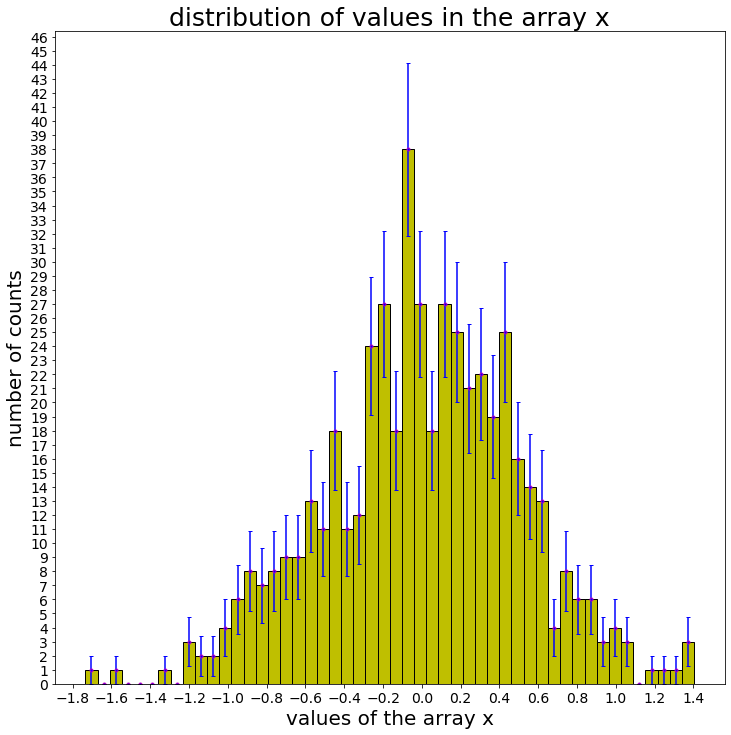

In [2]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(12, 12)) #generating the subplot with a figure object and an axes object

bin_values, edges, _ = ax.hist(x, bins=50,label='x', color='y', edgecolor='black') #generating a histogram and defining the bins values(the number of elements in a bin) and the bins edges

ax.set_xlabel('values of the array x', fontsize=20) #setting the label of the axis
ax.set_ylabel('number of counts', fontsize=20)
ax.set_title('distribution of values in the array x', fontsize=25) #setting the title

bin_centers= 0.5 * (edges[:-1] + edges[1:]) #defining the array of the centers of the bins on the x axis
bin_w=(edges[:-1] - edges[1:])

ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='b.', markeredgecolor='m',  capsize=2) #adding the errorbars

ax.tick_params(axis='x', labelsize=14) #setting the dimension of axis ticks
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2)) #setting the values to display on the axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(1)) 

do you want to set the std value(yes/no):no
0.5033357430155491


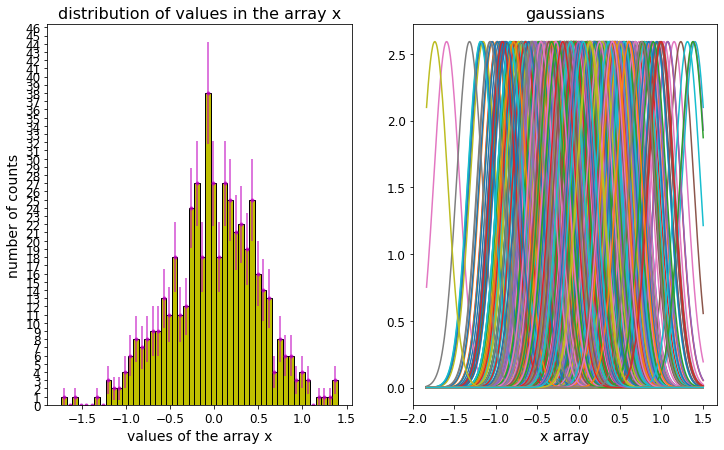

In [3]:
from scipy.stats import norm
import scipy as sci
import math as math


fig, (ax, ax_2)= plt.subplots(nrows=1, ncols=2, figsize=(12, 7)) #generating the subplot with a figure object and two axes objects, one for the histogram and one for the gaussian distributions

#repeting the process for the previous histogra,
bin_values, edges, _ = ax.hist(x, bins=50,label='x', color='y', edgecolor='black')

ax.set_xlabel('values of the array x', fontsize=14)
ax.set_ylabel('number of counts', fontsize=14)
ax.set_title('distribution of values in the array x', fontsize=16)

bin_centers= 0.5 * (edges[:-1] + edges[1:])
bin_w=(edges[:-1] - edges[1:])
ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='m.', alpha=0.7)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(1)) 


v=0
s=input('do you want to set the std value(yes/no):') #setting the possibility to decide the standard deviation of the gaussians
if s=='yes':
    v=input('set the value:')
    v=float(v)
else:
    v=1.06*(x.std())*(N**(-1/5)) #default value
    print(x.std())

    
std=np.full((N,), v) #generating a numpy array with all elements equal to the standard deviation set
pdf = np.zeros(shape=(N,)) #generating an empty array which will contain the generated gaussian
pdf_tot = np.zeros(shape=(N ,)) #generating an empty array which will contain the sum of the generated gaussians
l=[]

z=np.linspace(x.min()-0.1,x.max()+0.1, N) #defining the axis along wich to calculate the gaussians
for m,s in zip(x,std): #loop for with a zip in order to take the corresponding values of mean and standard deviation(as required the mean array is the x array)
    pdf=(norm.pdf(z,m,s)) #generating the gaussian
    ax_2.plot(z, pdf) #plotting the gaussian in the second axes object
    l.append(pdf)
    
l=np.asarray(l)
pdf_tot=np.sum(l,axis=0)



ax_2.set_xlabel('x array', fontsize=14) #setting axis ticks, labels and title parameters
ax_2.set_title('gaussians', fontsize=16)
ax_2.tick_params(axis='x', labelsize=12)
ax_2.tick_params(axis='y', labelsize=12)

    



In [4]:
pdf_area=sci.integrate.trapz(pdf_tot, x=z) #calculating the area under the gaussian obtained from the sum of the gaussians
print(f'the area of the gaussian is:{pdf_area}')

hist_area=sci.integrate.trapz(bin_values, x=bin_centers) #calculating the area of the histogram
print(f'the are of the histogram is:{hist_area}')

pdf_tot=pdf_tot*(hist_area/pdf_area) #normalizing the gaussian
pdf_area=sci.integrate.trapz(pdf_tot,x=z) #calculating the new area of the gaussian in order to check if the normalization is correct
print(f'the new area of the gaussian is:{pdf_area}')

the area of the gaussian is:498.82614253127633
the are of the histogram is:31.25029211348253
the new area of the gaussian is:31.25029211348253


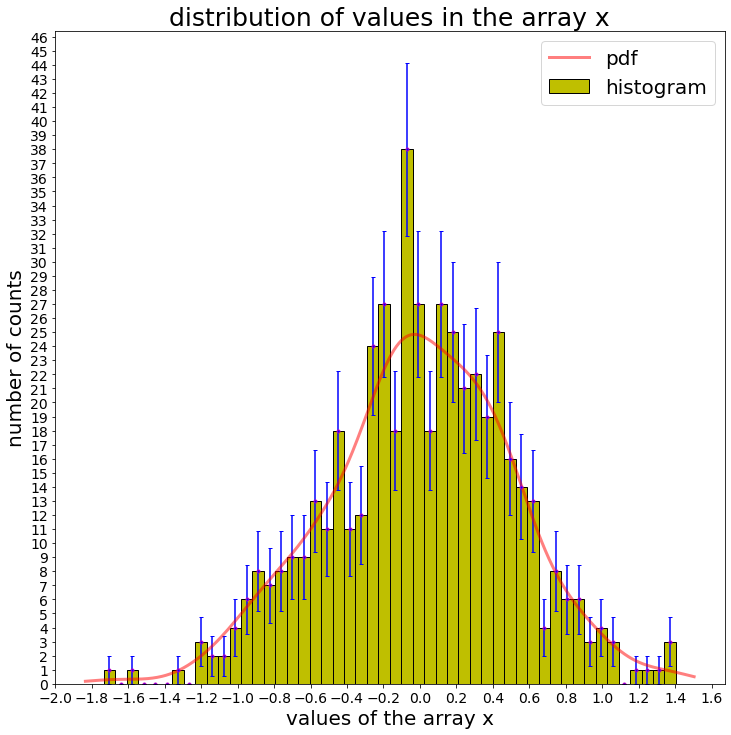

In [5]:
#repeting the process of the plot showing the first histogram but adding the calculated gaussian in order to fit the datas and check the distribution of them
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

bin_values, edges, _ = ax.hist(x, bins=50,label='x', color='y', edgecolor='black')
        
ax.set_xlabel('values of the array x', fontsize=20)
ax.set_ylabel('number of counts', fontsize=20)
ax.set_title('distribution of values in the array x', fontsize=25)

bin_centers= 0.5 * (edges[:-1] + edges[1:])
bin_w=(edges[:-1] - edges[1:])

ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='b.', markeredgecolor='m',  capsize=2)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.plot(z, pdf_tot,color='r',linewidth=3,alpha=0.5) 
ax.legend(['pdf','histogram'],loc='best',prop={"size":20}) #setting the legend


## Produce a profile plot from a scatter plot.

- Download the following dataset and load it as a pandas dataframe:

  wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
  
  Note that you should use the np.load() function to load the file as a numpy array, call the .item() method,     and then pass it to the pd.DataFrame() constructor.
- Inspect the dataset, you'll find two variables (features)
- Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
- perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
- plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
- Fill 3 numpy arrays
    - x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
    - y, the mean values of the "residuals", estimated in slices (bins) of "distance"
    - erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
- Plot the profile plot on top of the scatter plot

In [6]:
file=np.load('residuals_261.npy',allow_pickle=True) #loading the file

print(file) #inspecting the file
print(type(file))
print(file.shape)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
<class 'numpy.ndarray'>
()


In [7]:
res=file.item()['residuals'] #putting the elements of the two categories in two numpy arrays and reshaping them in order to create a dataframe
res=np.reshape(res,(1,res.shape[0]))

dis=file.item()['distances']
dis=np.reshape(dis,(1,res.shape[1]))

In [8]:
import pandas as pd
m = np.vstack([dis,res]) #generating a 2D array with the two previous array
print(m)

m = np.transpose(m) #reashaping the array in order to definy a dataframe
data=pd.DataFrame(m, columns=['distances','residuals']) #definying the dataframe
data

[[16.          6.3         3.4        ...  1.7        19.1
   2.6       ]
 [ 1.1        -1.95       -7.2        ...  0.08333333  0.16666667
   0.08333333]]


,distances,residuals
0,16.0,1.100000
1,6.3,-1.950000
2,3.4,-7.200000
3,8.4,-4.150000
4,1.7,-6.590000
...,...,...
11126,14.4,-0.760000
11127,7.5,0.380000
11128,1.7,0.083333
11129,19.1,0.166667


In [9]:
data=data[abs(data['residuals']) < 2 ] #filtering the data eliminating the ones corresponding to a residuals values larger than 2
data 

,distances,residuals
0,16.0,1.100000
1,6.3,-1.950000
8,3.3,-0.042857
9,5.3,0.128571
10,15.0,0.085714
...,...,...
11126,14.4,-0.760000
11127,7.5,0.380000
11128,1.7,0.083333
11129,19.1,0.166667


In [10]:
reg=sci.stats.linregress(data['distances'], data['residuals']) #doing a linear regression on the data
print(reg)

reg=[round(reg[i], 4) for i in range(len(reg))] #putting the rounded results of the regression in an array 
print(reg)

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789, intercept_stderr=0.008458951961471835)
[0.0033, -0.1543, 0.0434, 0.0, 0.0007]


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


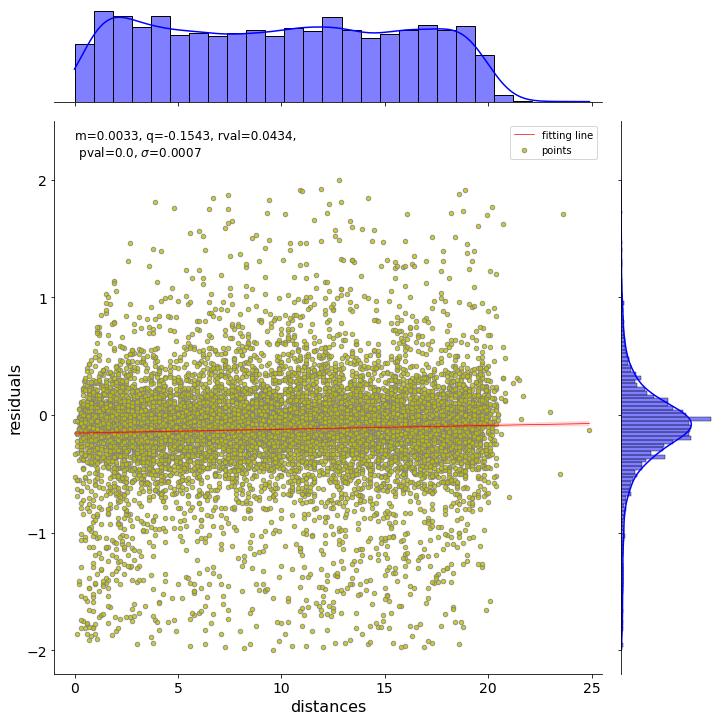

In [11]:
import seaborn as sns

g=sns.jointplot("distances", "residuals", data=data, kind="reg", color='y', height=10, scatter_kws={'s':20, 'ec':'gray'} ,joint_kws={'line_kws': {'linewidth': 0.7, 'color':'r'}}, marginal_kws={'color': 'b'}) #plotting a scatter plot and the linear regression with seaborn 

g.set_axis_labels("distances", "residuals", fontsize=16) #setting the axis labels
g.ax_joint.tick_params(axis='x', labelsize=14) #set axis ticks parameters
g.ax_joint.tick_params(axis='y', labelsize=14)
g.ax_joint.set_xlim(-1,25.5) #set the axis labels
g.ax_joint.set_ylim(-2.2,2.5)
g.ax_joint.text(0, 2.2, 'm='+str(reg[0])+', q='+str(reg[1])+', rval='+str(reg[2])+',\n pval='+str(reg[3])+', $\sigma$='+str(reg[4])+'', fontsize=12) #printing in the plot the results of the regression
g.ax_joint.legend(['fitting line','points']) #set of the legend

In [12]:
data=data[abs(data['distances']) < 20 ] #filtering the data eliminating the ones corresponding to a distances values larger than 20
data

,distances,residuals
0,16.0,1.100000
1,6.3,-1.950000
8,3.3,-0.042857
9,5.3,0.128571
10,15.0,0.085714
...,...,...
11126,14.4,-0.760000
11127,7.5,0.380000
11128,1.7,0.083333
11129,19.1,0.166667


In [13]:
_ , edges=np.histogram(data['distances'], bins=25) 

x= 0.5 * (edges[:-1] + edges[1:])
y=[]
erry=[]

for i in range(len(edges)-1):
    ghost_df=data[edges[i]<data['distances']]
    ghost_df=data[data['distances']<edges[i+1]]
    y.append(np.mean(ghost_df['residuals']))
    erry.append(np.std(ghost_df['residuals']))

    
y=np.asarray(y)
erry=np.asarray(erry)


In [14]:
m = np.vstack([x,y])

m = np.transpose(m)
data_2=pd.DataFrame(m, columns=['x','y'])
data_2

,x,y
0,0.399,-0.252304
1,1.197,-0.186652
2,1.995,-0.178357
3,2.793,-0.178860
4,3.591,-0.173190
5,4.389,-0.166006
6,5.187,-0.161087
7,5.985,-0.159240
8,6.783,-0.152312
9,7.581,-0.144867


In [ ]:
a=data['distances'] #generating arrays with the columns of the dataframe
b=data['residuals']

def customJoint(a,b): #defining a function which plots the required points. It will be added to the joint plot 
    
    _ , edges=np.histogram(a, bins=25) #taking the edges of the bins of the histogram of distances values
    x= 0.5 * (edges[:-1] + edges[1:]) #calculating the centrs
    
    y=[]
    erry=[]
    for i in range(len(edges)-1):
        ghost_df=data[edges[i]<a] #diving the dataset into the the intervals defined by the bins
        ghost_df=data[a<edges[i+1]]
        y.append(np.mean(ghost_df['residuals'])) #calculating the mean of the corresponding residuals values ant appending them in a list
        erry.append(np.std(ghost_df['residuals'])) #calculating the standard deviation of the corresponding residuals values ant appending them in a list

    
    y=np.asarray(y) #converting the lists into numpy arrays
    erry=np.asarray(erry)
    
    plt.errorbar(x, y, erry, fmt='s', color='black',markersize=2, linewidth=0.7, capsize=2) #defining an obljects that plots the means at the bin centers with the corresponding errorbar
    


#repeting the previous process for the joint plot but also adding the plot defined in the function 
g=sns.jointplot("distances", "residuals", data=data, kind="reg", color='y',height=10, scatter_kws={'s':20, 'ec':'gray'} ,joint_kws={'line_kws': {'linewidth': 1, 'color':'r'}}, marginal_kws={'color': 'b'}).plot_joint(customJoint)
g.set_axis_labels("distances", "residuals", fontsize=16)
g.ax_joint.tick_params(axis='x', labelsize=14)
g.ax_joint.tick_params(axis='y', labelsize=14)
g.ax_joint.set_xlim(-1,21)
g.ax_joint.set_ylim(-2.2,2.5)
g.ax_joint.text(0, 2.2, 'm='+str(reg[0])+', q='+str(reg[1])+', rval='+str(reg[2])+',\n pval='+str(reg[3])+', $\sigma$='+str(reg[4])+'', fontsize=12)
g.ax_joint.legend(['fitting line','points']) #set of the legend
 


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


## 2. Color-coded scatter plot

Produce a scatter plot out of a dataset with two categories

- Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
- Display the dataset in a scatter plot marking the two categories with different marker colors.
An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
def dataset(m1,m2,s1,s2,n): #defining the function that creates the dataset. The input values are the means and the standard deviation of the two categories and the number of samples
   
    mean=[m1,m1] #array of means 
    std=[[s1,0],[0,s1]] #covariance matrix
    x,y = np.random.multivariate_normal(mean, std, n).T #generating a two dimensional gaussian with the mean and the variance set and putting the coordinates along the axis in two arrays
    M1 = np.array([x,y]) #generating a 2D array which contains the previous arrays
    
    #repeting the previous process with different mean and standard deviation in order to generate the second category
    mean=[m2,m2]
    std=[[s2,0],[0,s2]]
    x, y = np.random.multivariate_normal(mean, std, n).T
    M2  = np.array([x,y])
    
    dictionary={'cat_1':M1, 'cat_2':M2} #definition of the dataset throught a dictionary
    
    return dictionary
 

    
mean = [0, 5] #setting the means of the two categories
std = [1,1] #setting the variances of the two categories

dataset=dataset(mean[0],mean[1],std[0],std[1],100) #generating. the dataset

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7)) #definiing a subplot with a figure object and an axes object

ax.scatter(x=dataset['cat_1'][0], y=dataset['cat_1'][1], marker='o', c='r') #plotting the points of the two categories

ax.scatter(x=dataset['cat_2'][0], y=dataset['cat_2'][1], marker='x', c='b')

ax.tick_params(axis='x', labelsize=14) #setting axis labels and ticks parameters
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_title('2D gaussian', fontsize=25) #setting the title
ax.legend(['category 1', 'category 2'],  prop={"size":20}) #setting the legend

In [ ]:
#The process of the scatter plot with more than two categories is the same as before

n=input('how many categories do you want to generate?:') #setting in input the number of categories and of samples
                                                                     
N=input('how many samples for each category? ') #the limit on the number of categories is made in order 
print('\n')
def dataset(a,b):
    
    dictionary={}
    
    for i in range(a): #for loop to generate the categories
        
        m=np.random.randint(0, 50)
        s=np.random.randint(0, 10)
        
        print(f'the mean of the category {i+1} is:{m}')
        print(f'the variance of the category {i+1} is:{s}')
        print('\n')
        
        mean=[m,m]
        std=[[s,0],[0,s]]
        
        x,y = np.random.multivariate_normal(mean, std, b).T
        
        M = np.array([x,y])
        
        dictionary[f'cat_{i}']=M
        
    
    return dictionary
 


dataset=dataset(int(n),int(N))

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

categories=[f'category {i}' for i in range(int(n))] #list of possible categories
print(categories)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.set_title('2D gaussian', fontsize=30)

for i in range(int(n)):
    
    ax.scatter(x=dataset[f'cat_{i}'][0], y=dataset[f'cat_{i}'][1],label=categories[i])
   

ax.legend(categories,  prop={"size":20})